In [35]:
import pandas as pd
from pandas_datareader import data
import datetime as datetime
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [415]:
#manually input these numbers

rev_mean= 41606
rev_stdev=3790.41
no_iterations=1000

In [418]:
rev=np.random.normal(rev_mean,rev_stdev,no_iterations)
rev

array([37052.49208689, 39659.88477911, 39874.73568112, 44595.07239371,
       47894.90636204, 39217.84435897, 38404.68456864, 41469.41756378,
       42095.41069768, 47096.92664366, 42642.9361271 , 44289.09695095,
       48414.46816768, 35908.22449879, 39835.39160677, 43241.39276744,
       44261.33210823, 42622.0219889 , 42550.48260021, 42033.49522222,
       38283.6650577 , 36579.41130329, 50707.98763684, 39014.86097646,
       43365.67190135, 37503.74183366, 43961.20584523, 34577.71593939,
       47244.95502804, 40574.40627548, 42860.68404551, 40415.01920288,
       36031.33566938, 41342.35370424, 39990.20312752, 39788.00868782,
       36342.81946883, 42704.4285726 , 44797.95833549, 43434.64802727,
       40288.79243663, 37858.69408726, 39105.72516665, 47758.10189421,
       41119.06102099, 38155.80591874, 43352.21259561, 40493.72610098,
       42172.08381461, 43008.77498417, 43308.82541668, 41253.5041757 ,
       36964.61852976, 40367.49639955, 31868.30464725, 46772.37345852,
      

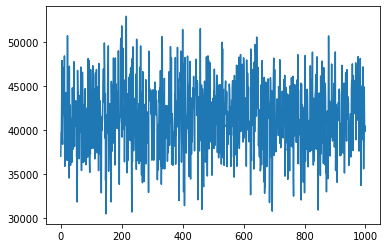

In [419]:
plt.plot(rev)

In [420]:
#input manually we saw historical is 60 percent and 10 percent stdev

COGS = -(rev*np.random.normal(0.42,0.1))

In [421]:
COGS.mean()

-14533.00863154932

In [422]:
COGS.std()

1345.5758927295758

In [423]:
gross_profit = rev+COGS

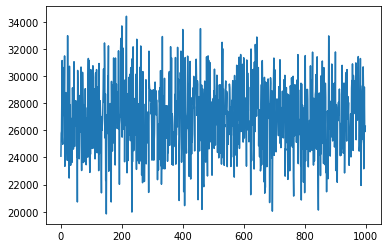

In [424]:
plt.plot(gross_profit)

(array([  6.,   8.,  10.,  23.,  36.,  53.,  69.,  77., 118., 114., 113.,
         97., 102.,  59.,  44.,  39.,  18.,   8.,   4.,   2.]),
 array([19840.45103244, 20568.5833207 , 21296.71560896, 22024.84789723,
        22752.98018549, 23481.11247375, 24209.24476201, 24937.37705028,
        25665.50933854, 26393.6416268 , 27121.77391506, 27849.90620333,
        28578.03849159, 29306.17077985, 30034.30306811, 30762.43535638,
        31490.56764464, 32218.6999329 , 32946.83222116, 33674.96450943,
        34403.09679769]),
 <a list of 20 Patch objects>)

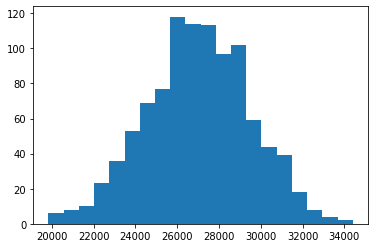

In [425]:
plt.hist(gross_profit,bins=20)

In [426]:
gross_profit.mean()

27015.59004196281

In [427]:
gross_profit.std()

2501.307720234597

In [428]:
# Now historical operating expenses for EBITDA
oper_exp=7182
oper_exp_dev=578.8

In [429]:
operating_expenses=-np.random.normal(oper_exp,oper_exp_dev,no_iterations)

In [430]:
operating_expenses.mean()

-7178.873286900436

In [431]:
operating_expenses.std()

581.6749156372883

In [432]:
ebitda=gross_profit+operating_expenses

(array([  2.,   5.,  10.,  12.,  22.,  47.,  70.,  77., 107., 112., 126.,
        112.,  85.,  83.,  50.,  35.,  26.,  11.,   6.,   2.]),
 array([11941.19271458, 12709.34896896, 13477.50522334, 14245.66147772,
        15013.8177321 , 15781.97398648, 16550.13024086, 17318.28649524,
        18086.44274962, 18854.599004  , 19622.75525838, 20390.91151275,
        21159.06776713, 21927.22402151, 22695.38027589, 23463.53653027,
        24231.69278465, 24999.84903903, 25768.00529341, 26536.16154779,
        27304.31780217]),
 <a list of 20 Patch objects>)

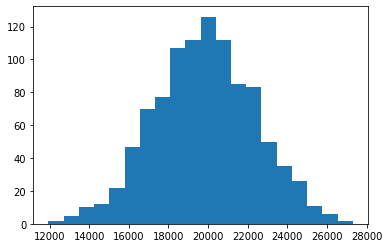

In [433]:
plt.hist(ebitda,bins=20)

In [434]:
start=datetime.datetime(2015,1,1)
end=datetime.datetime(2020,1,1)

In [435]:
ticker='ITC.NS'
ITC=pd.DataFrame()
ITC[ticker]=data.DataReader(ticker,'yahoo',start,end)['Adj Close']

In [436]:
ITC

,ITC.NS
Date,
2015-01-01,219.214172
2015-01-02,219.900192
2015-01-05,220.766251
2015-01-06,215.094391
2015-01-07,211.093704
...,...
2019-12-26,236.800003
2019-12-27,236.899994
2019-12-30,238.199997


In [437]:
log_ret=np.log(1+rel.pct_change())
log_ret

,ITC.NS
Date,
2015-01-01,NaN
2015-01-02,0.003125
2015-01-05,0.003931
2015-01-06,-0.026027
2015-01-07,-0.018775
...,...
2018-12-26,0.002352
2018-12-27,0.014711
2018-12-28,0.005329


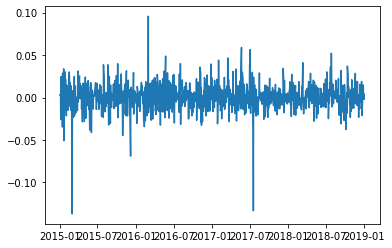

In [438]:
plt.plot(log_ret)

In [439]:
u=log_ret.mean()
u

ITC.NS    0.000239
dtype: float64

In [440]:
var=log_ret.std()

In [441]:
drift=u-(0.5*var)

In [442]:
drift

ITC.NS   -0.007753
dtype: float64

In [443]:
np.array(drift)

# or drift.values()

array([-0.00775323])

In [444]:
stdev=log_ret.std()

In [445]:
t_intervals=1000
iterations=10
x=np.random.rand(t_intervals,iterations)

In [446]:
daily_returns=np.exp(drift.values+x*stdev.values)

In [447]:

daily_returns

array([[1.00005905, 1.00096891, 1.00710563, ..., 0.99278172, 0.99901052,
        1.00799886],
       [0.99746799, 0.9986918 , 1.00269923, ..., 1.00361662, 0.99651321,
        1.00777945],
       [1.00123992, 1.00588573, 1.004253  , ..., 1.00129581, 0.99584737,
        0.99484575],
       ...,
       [0.99648367, 0.99786853, 1.00671086, ..., 1.00406032, 1.00199118,
        0.99855752],
       [0.99412542, 1.00674661, 0.99633393, ..., 1.00241164, 1.00406973,
        0.99736153],
       [1.00632139, 0.9931251 , 0.99863772, ..., 1.00649421, 1.00626787,
        1.00029563]])

In [448]:
s0=ITC.iloc[-1]

In [449]:
float(s0)

238.10000610351562

In [450]:
price_list=np.zeros_like(daily_returns)

In [451]:
price_list[0]=s0

In [452]:
price_list

array([[238.1000061, 238.1000061, 238.1000061, ..., 238.1000061,
        238.1000061, 238.1000061],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [453]:
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]

In [454]:
price_list

array([[238.1000061 , 238.1000061 , 238.1000061 , ..., 238.1000061 ,
        238.1000061 , 238.1000061 ],
       [237.49713436, 237.78852359, 238.74269214, ..., 238.96112342,
        237.26980127, 239.95229202],
       [237.79161192, 239.18808325, 239.75806528, ..., 239.27077076,
        236.28450735, 238.71551861],
       ...,
       [389.07661394, 402.00443862, 270.33681596, ..., 291.0504801 ,
        332.30406524, 320.02577524],
       [386.79095213, 404.71660727, 269.34574257, ..., 291.75238843,
        333.65645275, 319.18139614],
       [389.23600716, 401.9342204 , 268.97881813, ..., 293.64709113,
        335.74776768, 319.27575711]])

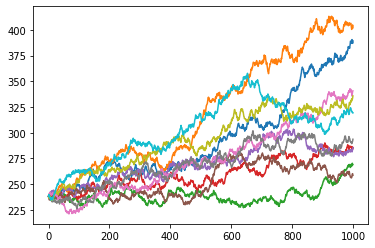

In [455]:
plt.plot(price_list)
# 10 possible plot paths for the stock

In [456]:
# This method is more feasible for low volatility stocks